<a href="https://colab.research.google.com/github/nicolasvazquez95/Aprendiendo_DeepLearning/blob/main/Convolution_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification with CNN

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip",'r')
zip_ref.extractall()
zip_ref.close()

--2022-01-19 18:48:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   163MB/s    in 3.0s    

2022-01-19 18:48:27 (163 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/train.
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi.
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger.
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen.
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza.
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream.
There are 10 directorie

In [ ]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

#Class names
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 384, 3)


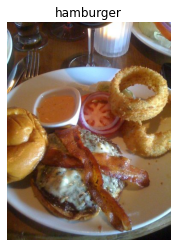

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               seed=42,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             seed=42,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
tf.random.set_seed(42)

model_1 = keras.models.Sequential([
                                 keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                                 keras.layers.Conv2D(10,3,activation='relu'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Conv2D(10,3,activation='relu'),
                                 keras.layers.Conv2D(10,3,activation='relu'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(10,activation='softmax')
])

model_1.summary()
model_1.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
history_1 = model_1.fit(train_data,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=len(test_data),
            epochs=5
            )

Epoch 1/5
235/235 [==============================] - 68s 229ms/step - loss: 2.1364 - accuracy: 0.2213 - val_loss: 1.9984 - val_accuracy: 0.2828
Epoch 2/5
235/235 [==============================] - 54s 230ms/step - loss: 1.8855 - accuracy: 0.3383 - val_loss: 1.8419 - val_accuracy: 0.3636
Epoch 3/5
235/235 [==============================] - 55s 233ms/step - loss: 1.6635 - accuracy: 0.4367 - val_loss: 1.8949 - val_accuracy: 0.3524
Epoch 4/5
235/235 [==============================] - 55s 233ms/step - loss: 1.2180 - accuracy: 0.5945 - val_loss: 2.0261 - val_accuracy: 0.3532
Epoch 5/5
235/235 [==============================] - 55s 234ms/step - loss: 0.6436 - accuracy: 0.7933 - val_loss: 2.5936 - val_accuracy: 0.3108


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,6))

  ax1.plot(epochs, loss,'--o', label='training_loss')
  ax1.plot(epochs, val_loss,'--o', label='val_loss')
  ax1.set_title('Loss')
  ax1.set_xlabel('Epochs')
  ax1.grid()
  ax1.legend()

  # Plot accuracy
  ax2.plot(epochs, accuracy,'--o', label='training_accuracy')
  ax2.plot(epochs, val_accuracy,'--o', label='val_accuracy')
  ax2.set_title('Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.grid()
  ax2.legend();

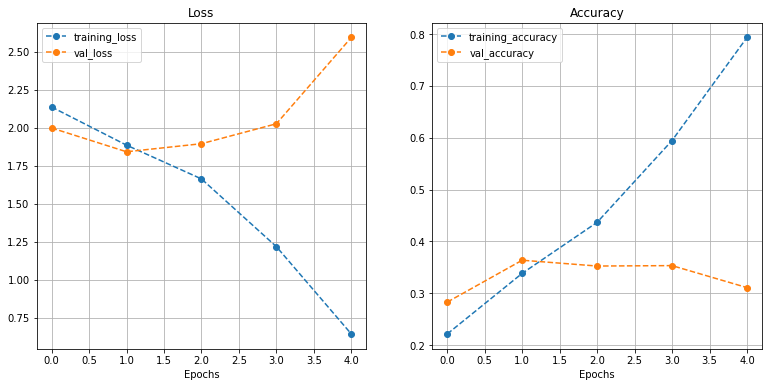

In [ ]:
plot_loss_curves(history)

## A new model with 2 Conv2D layer 

In [ ]:
model_2 = keras.models.Sequential([
                                 keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                                 #keras.layers.Conv2D(10,3,activation='relu'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Conv2D(10,3,activation='relu'),
                                 #keras.layers.Conv2D(10,3,activation='relu'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(10,activation='softmax')
])

model_2.summary()
model_2.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
history_2 = model_1.fit(train_data,steps_per_epoch=len(train_data),
            validation_data=test_data,validation_steps=len(test_data),
            epochs=5
            )

Epoch 1/5
235/235 [==============================] - 57s 239ms/step - loss: 2.1041 - accuracy: 0.2337 - val_loss: 1.9441 - val_accuracy: 0.3084
Epoch 2/5
235/235 [==============================] - 55s 235ms/step - loss: 1.9011 - accuracy: 0.3373 - val_loss: 1.9125 - val_accuracy: 0.3376
Epoch 3/5
235/235 [==============================] - 55s 232ms/step - loss: 1.6577 - accuracy: 0.4356 - val_loss: 1.8907 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 54s 232ms/step - loss: 1.1896 - accuracy: 0.6035 - val_loss: 2.2822 - val_accuracy: 0.3164
Epoch 5/5
235/235 [==============================] - 54s 230ms/step - loss: 0.6003 - accuracy: 0.8053 - val_loss: 2.8832 - val_accuracy: 0.2928


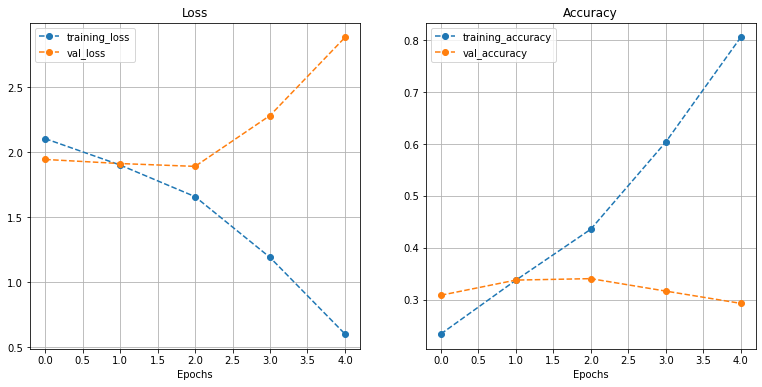

In [ ]:
plot_loss_curves(history_2)

## Data Augmentation!

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   seed=42
                                                                   )

Found 7500 images belonging to 10 classes.


In [ ]:
model_3 = keras.models.clone_model(model_1) # Misma arquitectura, pero resetea todos los parámetros!
model_3.compile(loss='categorical_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
history_3 = model_3.fit(train_data_augmented,steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,validation_steps=len(test_data),
            epochs=5
            )

Epoch 1/5
235/235 [==============================] - 130s 549ms/step - loss: 2.1891 - accuracy: 0.1973 - val_loss: 2.0285 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 127s 541ms/step - loss: 2.0529 - accuracy: 0.2599 - val_loss: 1.9524 - val_accuracy: 0.3220
Epoch 3/5
235/235 [==============================] - 128s 545ms/step - loss: 2.0022 - accuracy: 0.3003 - val_loss: 1.8415 - val_accuracy: 0.3652
Epoch 4/5
235/235 [==============================] - 127s 540ms/step - loss: 1.9481 - accuracy: 0.3204 - val_loss: 1.8207 - val_accuracy: 0.3780
Epoch 5/5
235/235 [==============================] - 127s 540ms/step - loss: 1.9192 - accuracy: 0.3348 - val_loss: 1.7687 - val_accuracy: 0.3988


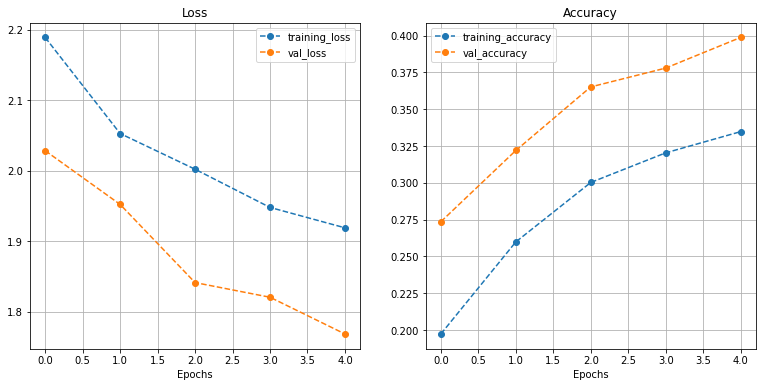

In [ ]:
plot_loss_curves(history_3)